<div Style="text-align: center;line-height: 30px;font-size:32px;font-weight: bold"> Data Augmentation</div>
***

In [70]:
%matplotlib inline
from __future__ import print_function
from ipywidgets import interact_manual, fixed

import os.path

from math import ceil

import numpy as np
import random

from skimage import io
from skimage.transform import rotate, rescale, resize

import matplotlib.pyplot as plt

import json

# 1. Cambios de tamaño en la imagen

Debemos de tener en cuenta que en todos los cambios que realicemos sobre una imagen, tendremos que, a su vez, cambiar las etiquetas realizadas sobre la imagen con los cambios correspondientes. Para que las coordenadas de las etiquetas realizadas en un primera ocasión coincidan con las etiquetas en la imagen modificada.

En este caso, debemos de rescalar las coordenadas proporcionalmente al factor de rescalado.

In [71]:
import warnings
warnings.filterwarnings('ignore')

original_img = io.imread("..\\..\\doc\\img\\2.jpg")

# Factores de rescalado
factors = [0.6, 0.8, 1.2]

# Coordenadas ejemplo
coords = [[5,5,30,30],[50,90,90,10],[10,10,30,50],[250,300,10,40]]

## 1.1. Rescalado en los dos ejes

In [72]:
r_imgs = []
r_imgs.append(rescale(original_img, factors[0]))
r_imgs.append(rescale(original_img, factors[1]))
r_imgs.append(rescale(original_img, factors[2]))

In [73]:
def rescale_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        rescale_coords.append([c * factor for c in coord])
    return rescale_coords

In [74]:
rescale_c = []
rescale_c.append(rescale_coords(coords, factors[0]))
rescale_c.append(rescale_coords(coords, factors[1]))
rescale_c.append(rescale_coords(coords, factors[2]))

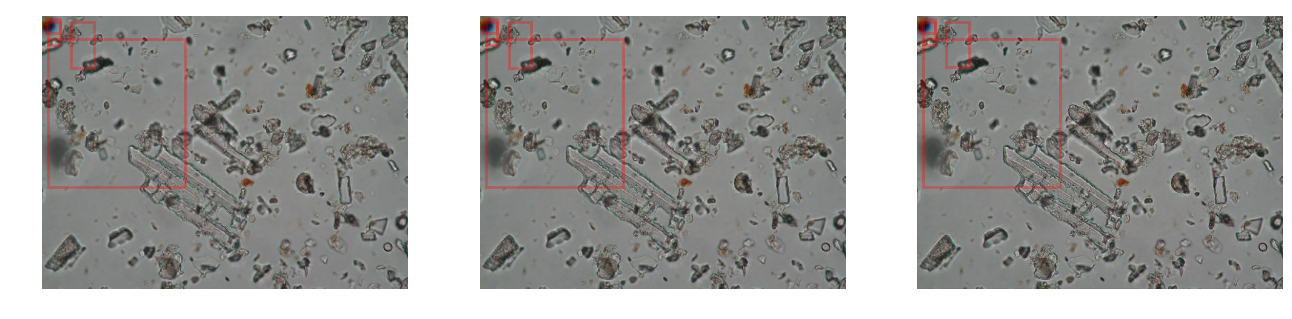

In [75]:
# Mostramos las imagenes resultantes
# Las imágenes se muestran con el mismo 
# tamaño, aunque sean de distinto tamaño

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_imgs[i])
    ax.axis('off')
    for coord in rescale_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.2. Rescalado en el eje horizontal

In [76]:
def rescale_one_image_axis(image, factor, axis=0):
    h, w = image.shape[:2]
    
    if axis == 0:
        w = w * factor
    elif axis == 1:
        h = h * factor
    else:
        raise "Axis should be equalts to 0 o 1"
    
    return resize(image,(h,w))

In [77]:
r_h_imgs = []
r_h_imgs.append(rescale_one_image_axis(original_img, factors[0]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[1]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[2]))

In [78]:
def rescale_h_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = coord
        r_coord[0] = r_coord[0] * factor
        r_coord[2] = r_coord[2] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [79]:
rescale_h_c = []
rescale_h_c.append(rescale_h_coords(coords, factors[0]))
rescale_h_c.append(rescale_h_coords(coords, factors[1]))
rescale_h_c.append(rescale_h_coords(coords, factors[2]))

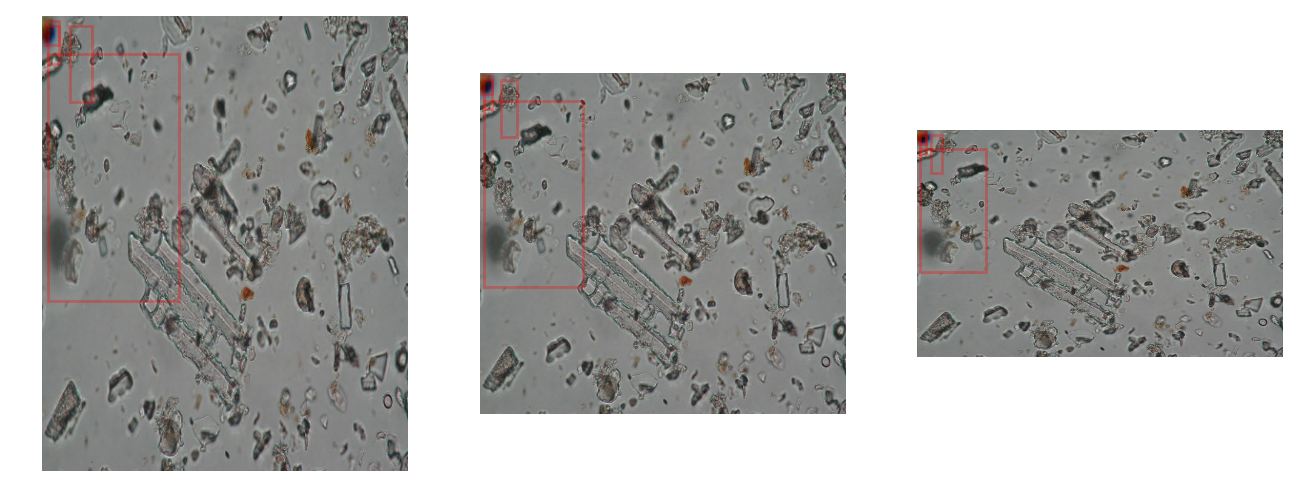

In [80]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_h_imgs[i])
    ax.axis('off')
    for coord in rescale_h_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.3. Rescalado en el eje vertical

In [81]:
r_v_imgs = []
r_v_imgs.append(rescale_one_image_axis(original_img, factors[0],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[1],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[2],1))

In [82]:
def rescale_v_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = coord
        r_coord[1] = r_coord[1] * factor
        r_coord[3] = r_coord[3] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [83]:
rescale_v_c = []
rescale_v_c.append(rescale_v_coords(coords, factors[0]))
rescale_v_c.append(rescale_v_coords(coords, factors[1]))
rescale_v_c.append(rescale_v_coords(coords, factors[2]))

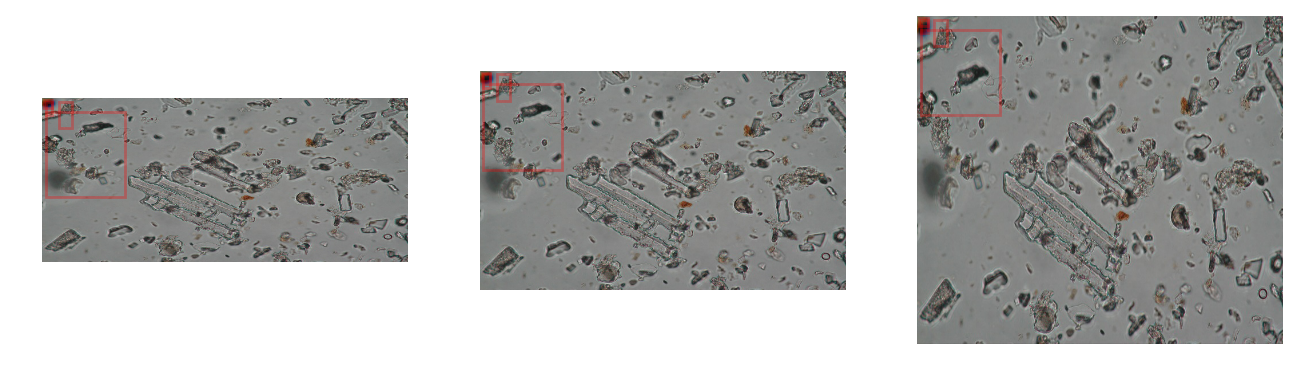

In [84]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_v_imgs[i])
    ax.axis('off')
    for coord in rescale_v_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 2. Espejar imágenes

En este caso, deberemos de espejar las coordenadas, como espejamos la imagen.

In [85]:
flipped_imgs = []

# Damos la vuelta a la imagen en el eje vertical
flipped_imgs.append(np.flipud(original_img))

# Damos la vuelta a la imagen en el eje horizontal
flipped_imgs.append(np.fliplr(original_img))

In [86]:
def flipud_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        height = coord[3] - coord[1]
        
        y2 = img_h - coord[1]
        y = y2 - height
        
        flipped_coords.append([coord[0],y,coord[2],y2])
    return flipped_coords

In [87]:
def fliplr_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        width = coord[2] - coord[0]
        
        x2 = img_w - coord[0]
        x = x2 - width
        
        flipped_coords.append([x,coord[1],x2,coord[3]])
    return flipped_coords

In [88]:
f_coords = [flipud_coords(original_img.shape[0], original_img.shape[1], coords)]
f_coords.append(fliplr_coords(original_img.shape[0], original_img.shape[1], coords))

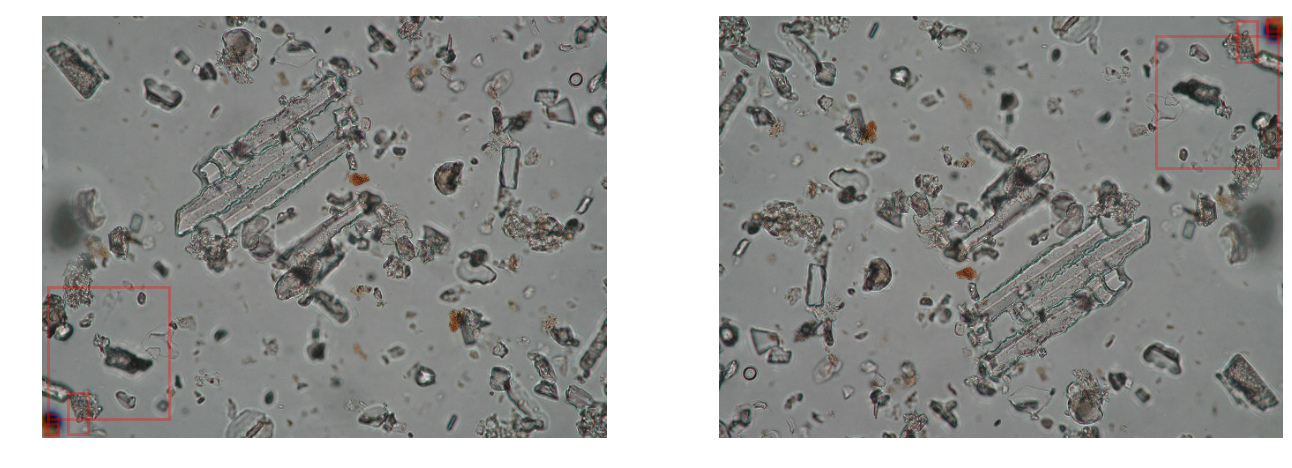

In [89]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=2, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(flipped_imgs[i])
    ax.axis('off')

    for coord in f_coords[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 3. Ruido en las imágenes

En este caso, las coordenadas no se ven modificadas.

In [90]:
from skimage.util import random_noise

In [91]:
noise_imgs = []

# Valores por defecto mode='gaussian'
# mean = 0, var = 0.01
# amount = 0.05, salt_vs_pepper = 0.5

noise_imgs.append(random_noise(original_img,mode="gaussian", mean=0, var=0.01))
noise_imgs.append(random_noise(original_img,mode="pepper", amount=0))
# Se puede utilizar el parametro local_vars a modo de matriz
# para indicar la varianza local en cada pixel, para el modo "localvar"
noise_imgs.append(random_noise(original_img,mode="localvar"))
noise_imgs.append(random_noise(original_img,mode="poisson"))
noise_imgs.append(random_noise(original_img,mode="salt", amount=0.05))
noise_imgs.append(random_noise(original_img,mode="s&p", amount=0.05, salt_vs_pepper=0.5))
noise_imgs.append(random_noise(original_img,mode="speckle", mean=0, var=0.1))

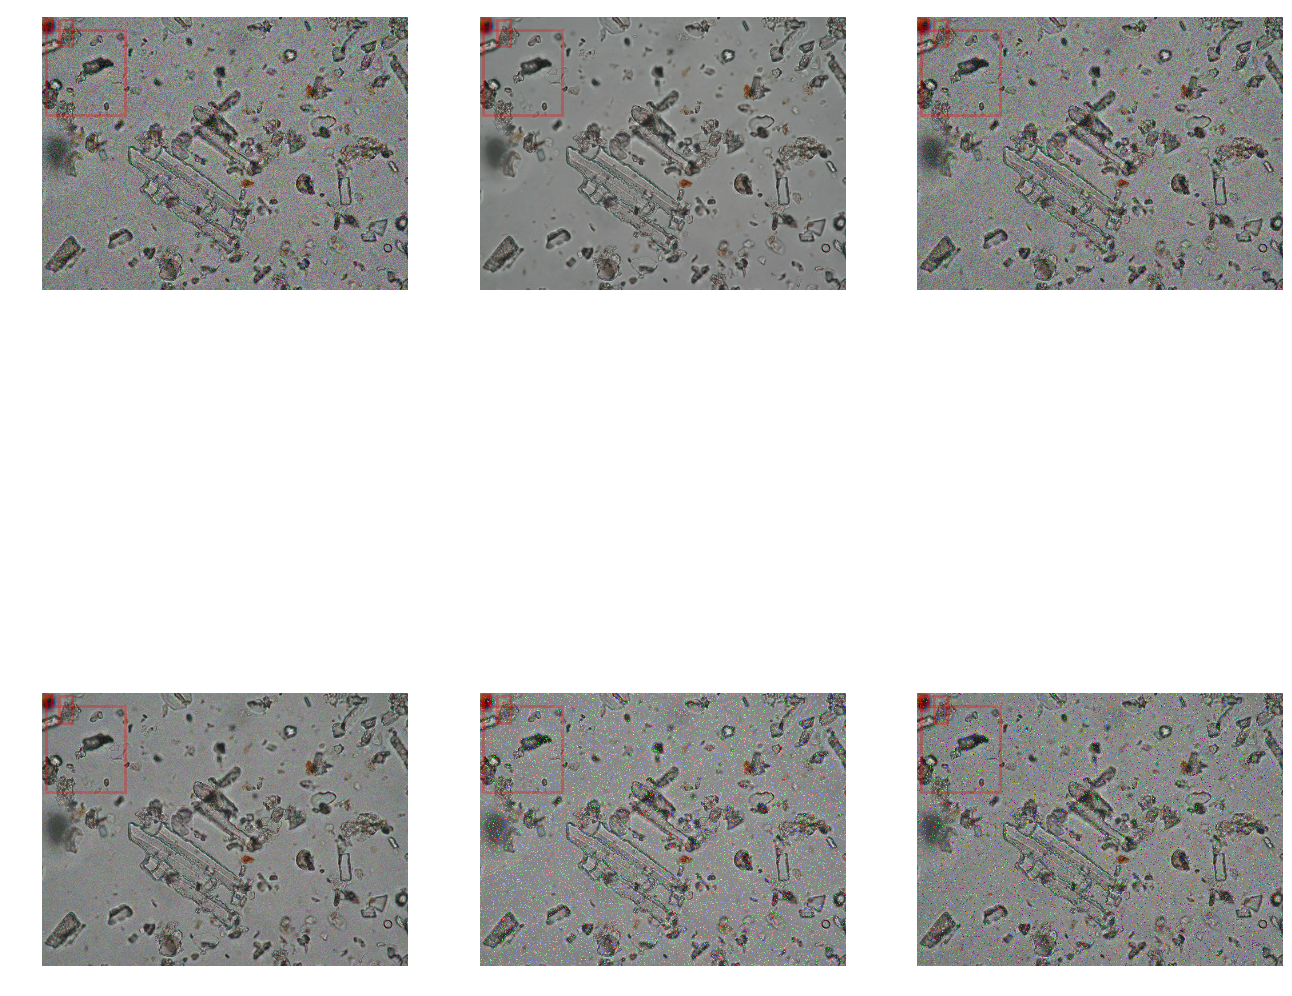

In [92]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols= 3, 
                         nrows= 2,
                         figsize=(16, 16), 
                         subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
i=0
for ax in axes:

    ax.imshow(noise_imgs[i])
    ax.axis('off')

    for coord in coords:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 4. Rotaciones de 90, 180 y 270 grados

Rotamos las imágenes y , con ellas, las coordenadas.

In [93]:
rot_imgs = []

rot_imgs.append(rotate(original_img,90,resize=True))
rot_imgs.append(rotate(original_img,180,resize=True))
rot_imgs.append(rotate(original_img,270,resize=True))

Rotamos las coordenadas

In [94]:
def rotate_coords(img_h, img_w, angle, coords):
    '''Rotación de coordenadas solo implementado
    para ángulos de 90 en 90 grados'''
    rotated_coords = []
    #coord = x, y, x2, y2
    for coord in coords:
        if angle == 90:
            x = coord[1]
            y = img_w - coord[2]
            x2 = coord[3]
            y2 = y + coord[2] - coord[0]
        elif angle == 180:
            x = img_w - coord[2]
            y = img_h - coord[3]
            x2 = x + coord[2] - coord[0]
            y2 = y + coord[3] - coord[1]
        elif angle == 270:
            x = img_h - coord[3]
            y = coord[0]
            x2 = x + coord[3] - coord[1]
            y2 = y + coord[2] - coord[0]
        else:
            raise ValueError("Only implemented for 90, 180 and 270 degrees")
        rotated_coords.append([x,y,x2,y2])
    return rotated_coords

In [95]:
rot_coords = [rotate_coords(original_img.shape[0], original_img.shape[1], 90,coords)]
rot_coords.append(rotate_coords(original_img.shape[0], original_img.shape[1], 180,coords))
rot_coords.append(rotate_coords(original_img.shape[0], original_img.shape[1], 270,coords))

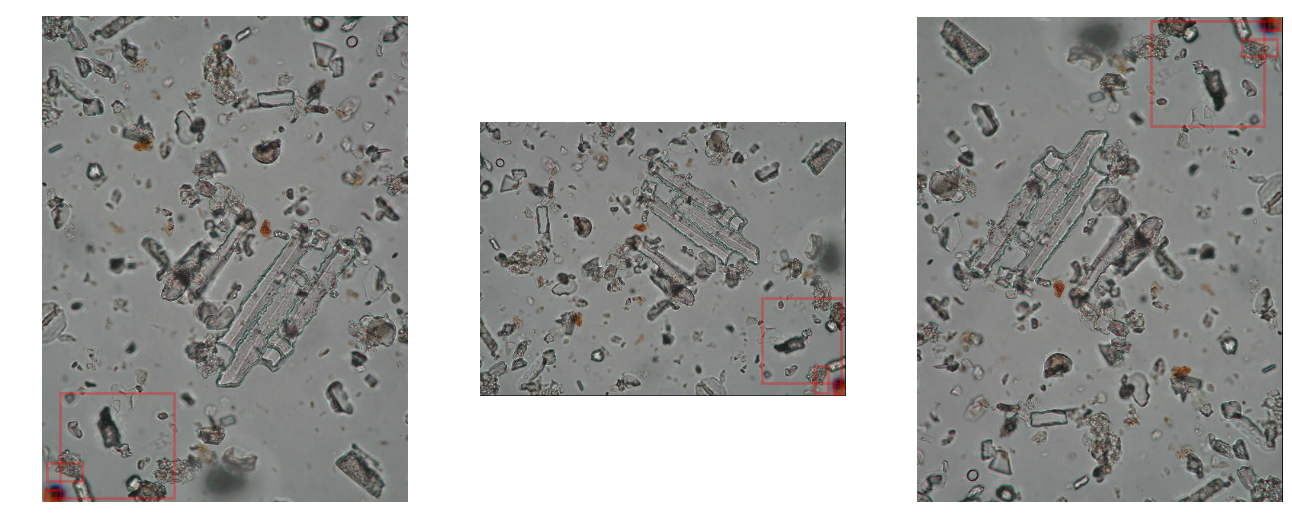

In [96]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(rot_imgs[i])
    ax.axis('off')
    
    for coord in rot_coords[i]:
        #x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# Generador de imágenes

In [97]:
# Contamos el número de imágenes que tenemos en
# el directorio de las imágenes etiquetadas
import os, os.path
import re

path="..//rsc//img//Default"
dest_path = "..//rsc//img//imgaum//"
pattern = re.compile("^.*\.jpg$", re.IGNORECASE)

def list_images(path='..//rsc//img//Default'):
    images_list = []
    for name in os.listdir(path):
        json_name = name.split(".")[0] + ".json"
        if pattern.match(name) \
        and os.path.exists(path + "//" + json_name):
            images_list.append(path + "//" + name)
    return images_list

In [98]:
probs_technic = 0.66
probs_especific_technic = 0.88
probs_subespecific_technic = [0.88, 0.92, 0.96] 

In [99]:
def random_resize(image, coords_dict):
    # Cambio de tamaño de imagen
    # 1. Ambos ejes
    # 2. Eje vertical
    # 3. Eje horizontal
    rands_for_resize = [random.random() for j in range(3)]
    if rands_for_resize[0] > probs_especific_technic:
        rand = random.uniform(0.6, 1.2)
        
        image = rescale(image, rand)
        for k, coord in coords_dict.item():
            coords[k] = rescale_coords(coords_dict[k], rand)
        
    if rands_for_resize[1] > probs_especific_technic:
        rand = random.uniform(0.6, 1.2)
        
        image = rescale_one_image_axis(image, rand)
        
        for k, coord in coords_dict.item():
            coords[k] = rescale_h_coords(coords_dict[k], rand)
        
    if rands_for_resize[2] > probs_especific_technic:
        rand = random.uniform(0.6, 1.2)
        
        image = rescale_one_image_axis(image, rand, 1)
        
        for k, coord in coords_dict.item():
            coords[k] = rescale_h_coords(coords_dict[k], rand)
            
    return image,coords_dict

In [100]:
def random_flip(image, coords_dict):
    rands_for_flip = [random.random() for j in range(2)]
    if rands_for_flip[0] > probs_especific_technic:
        pass
    if rands_for_flip[1] > probs_especific_technic:
        pass

In [101]:
def my_random_noise(image, coords_dict):
    rands_for_noise = [random.random() for j in range(2)]
    if rands_for_noise[0] > probs_especific_technic:
        pass
    if rands_for_noise[1] > probs_especific_technic:
        pass

In [102]:
def random_rotate(image, coords_dict):
    rands_for_rotation = [random.random() for j in range(2)]
    if rands_for_rotation[0] > probs_especific_technic:
        pass
    elif rands_for_rotation[1] > probs_especific_technic:
        pass
    else:
        pass

In [103]:
images_names_list = list_images(path)
initial_value = len(images_names_list)
end_value = initial_value * 100

def data_augmentation_generator(number_of_images, initial_value, end_value, images_names_list, dest_path):
    # Calculamos el número de imágenes que hay
    # que generar por cada imagen hasta llegar
    # al número especificado por el usuario
    if initial_value == 0:
        raise ValueError("Number of images must be greater than 0")
    
    images_per_image = ceil(number_of_images / initial_value)
    
    counter = 0
    # Generamos imágenes con filtros aleatorios
    # hasta llegar a completar el número deseado
    for name in images_names_list:
        
        original_image = io.imread(name)
        
        json_path = ".." + name.split(".")[-2] + ".json"
        image_name = os.path.split(name)[1].split(".")[0]
        image_with_format = image_name + ".jpg"
        # Cargamos coordenadas, si existen,
        # y si no existe fichero de coordenadas
        # pasamos a la siguiente imagen
        if os.path.exists(json_path):
            with open(json_path) as jsonfile:
                coords_dict = json.load(jsonfile)[image_with_format]
        else:
            continue

        for i in range(images_per_image):
            
            # Paramos si hemos llegado al número
            # de imágenes que deseamos
            if counter == end_value:
                    break
            
            mod_image = original_image
            mod_coords = coords_dict
        
            # Generamos números aleatorios a partir
            # de los cuales aplicamos un filtro 
            # o no a una imágen
            rands = [random.random() for j in range(4)]
            
            if rands[0] > probs_technic:
                pass #mod_image, mod_coords = random_resize(mod_image, mod_coords)
            
            # Espejados de imagen
            # 1. Espejado vertical
            # 2.  Espejado horizontal
            if rands[1] > probs_technic:
                pass
            
            # Ruido en las imágenes
            # 7 tipos de ruido
            if rands[2] > probs_technic:
                pass
            
            # Rotaciones
            # En 90, 180 o 270 grados
            if rands[3] > probs_technic:
                pass
            
            # Guardamos imagen
            io.imsave(dest_path + image_name + str(counter) + ".jpg",
                                       mod_image, quality=100)
            
            with open(dest_path + image_name + str(counter) + ".json", "w") as jsonfile:
                mod_coords_dict = dict()
                mod_coords_dict[dest_path + image_name + str(counter) + ".jpg"] = mod_coords
                json.dump(mod_coords_dict, jsonfile)
                
            counter += 1
            
interact_manual(data_augmentation_generator, 
                number_of_images=(initial_value,end_value,10),
                initial_value=fixed(initial_value),
                end_value=fixed(end_value),
                images_names_list=fixed(images_names_list),
                dest_path=fixed(dest_path))

KeyError: '2017_5_10_0_0Image_506_1.jpg'